<a href="https://colab.research.google.com/github/anaisha-d/Spotify-Music-Recomendations-/blob/main/Spotify_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Data Science with Spotify data**
We'll be exploring the audio features of the Spotify music 

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload() #Upload the data from https://www.kaggle.com/datasets/leonardopena/top50spotify2019

Saving top50.csv to top50.csv


In [ ]:
df = pd.read_csv("top50.csv", encoding = "Windows-1252")


In [ ]:
df.head() #shows the first five track data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
df #shows full data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [ ]:
df.columns #the columns of our dataframe

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [ ]:
df.rename(columns={'Track.Name':'track_name',
                   'Artist.Name':'artist_name',
                   'Beats.Per.Minute':'BPM',
                   'Loudness..dB..':'Loudness(dB)',
                   'Valence.':'Valence','Length.':'Length', 
                   'Acousticness..':'Acousticness',
                   'Speechiness.':'Speechiness'},inplace=True)

In [ ]:
audioFeatures = df[['Danceability', 'Energy',
       'Loudness(dB)', 'BPM', 'Speechiness', 'Acousticness', 'Length',
       'Liveness', 'Valence']].copy()
audioFeatures['Length'] *= 10
audioFeatures.head()

,Danceability,Energy,Loudness(dB),BPM,Speechiness,Acousticness,Length,Liveness,Valence
0,76,55,-6,117,3,4,1910,8,75
1,79,81,-4,105,9,8,3020,8,61
2,40,80,-4,190,46,12,1860,16,70
3,64,65,-8,93,19,12,1980,8,55
4,58,65,-4,150,7,45,1750,11,18


In [ ]:
df.describe() #shows summary statistics for each of our columns

,Unnamed: 0,BPM,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


#We can also use seaborn to make graphs of our data


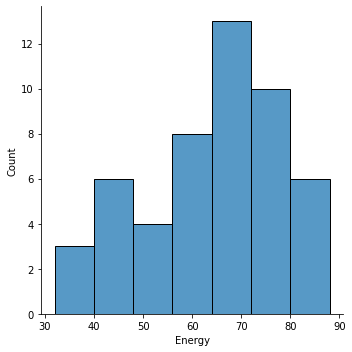

In [ ]:
import seaborn as sns
sns.displot(df["Energy"]) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


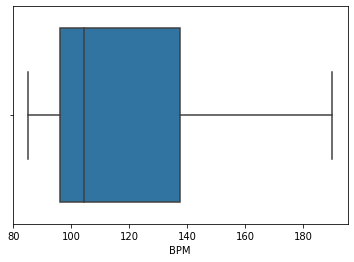

In [ ]:
sns.boxplot(df["BPM"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


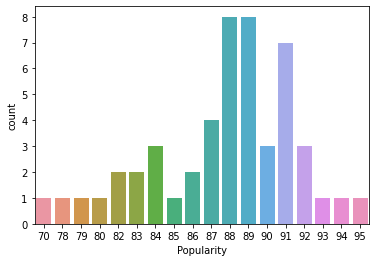

In [ ]:
sns.countplot(df["Popularity"])

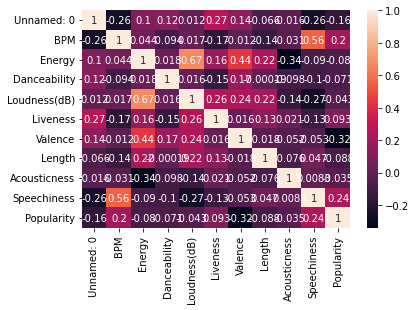

In [ ]:
sns.heatmap(df.corr(), annot = True)



# Find a song that best suits your music taste


In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.4/236.4 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from getpass import getpass
secret = getpass('Enter the secret value: ')

Enter the secret value: ··········


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id="ccd8a26da1c944b3be7fe55202efed8b", client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
song_name = input("What is your favorite song?")
artist = input("What is the name of that song's artist?")

What is your favorite song?our song
What is the name of that song's artist?taylor


In [ ]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q=f'track:{song_name}, artist:{artist}', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [ ]:
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
print(track_df.head())
track_id = track_df['track_id'][0]

(21, 5)
    artist_name track_name                track_id  track_popularity  \
0  Taylor Swift   Our Song  15DeqWWQB4dcEWzJg15VrN                71   
1  Taylor Swift   Our Song  43H3q2NWT9LCuYS1B5IUvV                62   
2  Taylor Swift   Our Song  7qGr3rjRhndRIpFUA5f2HJ                38   
3  Taylor Swift       Ours  0V3SNHDka1JSCP71HAzpxw                38   
4  Taylor Swift   Our Song  0XpLIGCtHEEt7ZePgaY65p                17   

                artist_id  
0  06HL4z0CvFAxyc27GXpf02  
1  06HL4z0CvFAxyc27GXpf02  
2  06HL4z0CvFAxyc27GXpf02  
3  06HL4z0CvFAxyc27GXpf02  
4  06HL4z0CvFAxyc27GXpf02  


In [ ]:
audio_ind = ['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'duration_ms','liveness', 'valence']
my_track_audio_features = []
for i in audio_ind:
  my_track_audio_features.append(sp.audio_features(tracks=[track_id])[0][i])
print(my_track_audio_features)

[0.668, 0.672, -4.931, 89.011, 0.0303, 0.111, 201107, 0.329, 0.539]


In [ ]:
# Convert to np vectors
my_song = np.array(my_track_audio_features) * 100
print(my_song)

[ 6.68000e+01  6.72000e+01 -4.93100e+02  8.90110e+03  3.03000e+00
  1.11000e+01  2.01107e+07  3.29000e+01  5.39000e+01]


In [ ]:
my_song.shape

(9,)

In [ ]:
top50AF = audioFeatures.to_numpy()
np.array(top50AF)[0]

array([  76,   55,   -6,  117,    3,    4, 1910,    8,   75])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
listofSimilarity = []
my_song = my_song.reshape(9,1)
#using cosine similarity
for i in range(50):
  cos_sim = cosine_similarity(top50AF[i],my_song)
  listofSimilarity.append(cos_sim)
print(listofSimilarity)

ValueError: ignored

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np

In [ ]:
# Set prediction target which will be Popularity
y = df.Popularity

# Features used to predict
features = ["BPM", "Energy", "Danceability"
            ,"Loudness(dB)", "Liveness", "Valence","Length","Acousticness"
            ,"Speechiness"]

X = df[features]

# Set up dict of the range of values for each song feature
# The range of values is used for the user to choose from
feature_dict = {'BPM': [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
                 'Energy': [30, 40, 50, 60, 70, 80, 90],
                 'Danceability': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                 'Loudness(dB)': [-11, -9, -7 ,5, -4, -2, 0],
                 'Liveness': [0, 10, 20, 30, 40, 50],
                 'Valence': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                 'Length': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300],
                 'Acousticness': [0, 10, 20, 30, 40, 50, 60],
                 'Speechiness': [0, 5, 10, 15, 20, 25, 30, 35, 40]}

# The current array being used as the feature value drop down box
current_dropdown = feature_dict['BPM']

# The chosen feature (default to BPM)
chosen_feature = 'BPM'

# Called when user chooses a value for the feature chosen
# Begins the prediction of popularity
def begin_prediction(Value):
    # Begin prediction
    global chosen_feature
    print('Prediction for: {} - {}'.format(chosen_feature, Value))
    
    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y)
    model = linear_model.LinearRegression()
    train_X[chosen_feature] = Value
    model.fit(train_X, train_y)
    
    # Predict popularity
    lm_predict = model.predict(val_X)
    print(lm_predict)    
    
    # Calculate error
    print('\n\nCALCULATING ERROR...')
    print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, lm_predict))
    print('Mean Squared Error:', metrics.mean_squared_error(val_y, lm_predict))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, lm_predict)))

# Is called when user clicks a feature from the dropdown list
# Will display another dropdown list of a different range of values depending on which feature is chosen
def setup_feature_pick(Feature):
    global current_dropdown
    global chosen_feature
    # feature_index = features.index(Feature) # Retrieve the index of the chosen feature
    current_dropdown = feature_dict[Feature] # Update the global current dropdown of feature vals
    chosen_feature = Feature # Update the chosen feature to be used in the prediction model
    interact(begin_prediction, Value = current_dropdown) # Init a new dropdown containing the chosen feature val array


# Dropdown list of features. Inits another dropdown list of values 
interact(setup_feature_pick, Feature = features)

interactive(children=(Dropdown(description='Feature', options=('BPM', 'Energy', 'Danceability', 'Loudness(dB)'…

<function __main__.setup_feature_pick(Feature)>